# MVA diagnostics

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!less ../data/GK_modes/README

7=Dispersion relations
The titles are self explanatory. The relevant columns are 
1 kpar rho_i (this values is arbitrary)
2 kperp rho_i
8 omega / kpar vA
9 gamma / kpar vA
17-22 Re(Bx), Im(Bx), …, Im(Bz)
(END) 

In [26]:
pwd

'/Volumes/yuguang_sd/report/laplace_fourier_analysis/python/Draft'

In [5]:
b001_alfven_files = '../data/GK_modes/solgk_alf_b001_cb_ext.eig'
b1_alfven_files = '../data/GK_modes/solgk_alf_b1.eig'
b001_slow_files = '../data/GK_modes/solgk_slow_b001.eig'
b1_slow_files = '../data/GK_modes/solgk_slow_b1.eig'

In [7]:
b001_alfven_data = np.loadtxt(b001_alfven_files)
b1_alfven_data = np.loadtxt(b1_alfven_files)
b001_slow_data = np.loadtxt(b001_slow_files)
b1_slow_data = np.loadtxt(b1_slow_files)

In [12]:
data_list = [b001_alfven_data, b001_slow_data, b1_alfven_data, b1_slow_data]
kperp_list, kpar_list, mva_list = [], [], []
w_list, gamma_list = [], []
for data in data_list:
    kperp = data[:, 1]
    Ebperp = np.sum( data[:, 16:20]**2 , axis = 1)
    Ebpar = np.sum( data[:, 20:22]**2 , axis = 1)
    mva = Ebperp/Ebpar
    kperp_list.append(kperp)
    mva_list.append(mva)
    w_list.append(data[:, 7])
    gamma_list.append(data[:, 8])

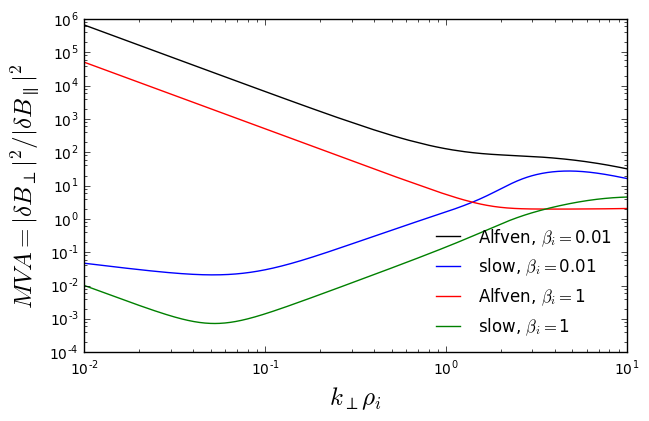

In [45]:
fs = 18
colors = ['black', 'blue', 'red', 'green']
modes = ['Alfven', 'slow', 'Alfven', 'slow']
betas = ['0.01', '0.01', '1', '1']

fig = plt.figure(figsize = [7, 4.3])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], mva_list[i], color=colors[i], 
             label = r'{}, $\beta_i = ${}'.format(modes[i], betas[i]))
plt.xlim(0.01, 10)
plt.ylim([1e-4, 1e6])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel(r'$MVA=|\delta B_\perp|^2/ |\delta B_\parallel|^2$', fontsize = fs)
plt.legend(loc='best', frameon=False)
# fig.savefig('../figures/GK_MVA.png', dpi=200)

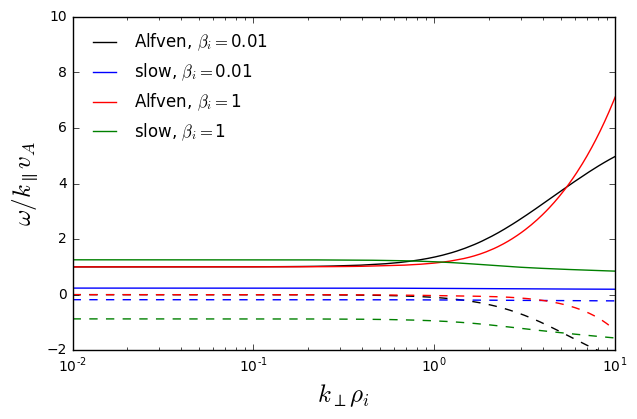

In [47]:
fs = 18
colors = ['black', 'blue', 'red', 'green']
fig = plt.figure(figsize = [7, 4.3])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], w_list[i], color = colors[i],
            label = r'{}, $\beta_i = ${}'.format(modes[i], betas[i]))
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], gamma_list[i], '--', color = colors[i])
plt.xscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel(r'$\omega/k_\parallel v_A$', fontsize = fs)
plt.ylim(-2, 10)
plt.xlim(1e-2, 10)
plt.legend(loc='best', frameon=False)
# fig.savefig('../figures/GK_disp_rel.png', dpi = 200)

## Fitting

- a = energy fraction of Alfven mode = 1-s
- s = energy fraction of slow mode
- ma = $MVA_{Alfven}$
- ms = $MVA_{slow}$
- m = MVA in the mixed mode simulation

\begin{eqnarray}
m &=& \frac{\delta B_\perp^2}{\delta B_\parallel^2}= \frac{(1-s)\times \frac{ma}{1+ma} + s \times \frac{ms}{1+ms}} {(1-s)\times\frac{1}{1+ma} + s \times \frac{1}{1+ms}} \\
&=& \frac{ma(1+ms) - s(ma-ms)}{(1+ms) + s(ma-ms)}
\end{eqnarray}

Hence
$$
s = \frac{(ma-m)(1+ms)}{(1+m)(ma-ms)}
$$

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/alfven/'
data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/mix_080/'
# data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/mix_080_decay2/'
file_names = ['mix_1.heat', 'mix_2.heat', 'mix_3.heat']
# file_names = ['mix_large_4a_next.heat', 'mix_large_4a_6.heat', 'mix_large_7.heat', 'mix_large_8.heat']
# file_names = ['mix_large_8.heat']
# file_names = ['alfven_large_4a_next.heat', 'alfven_large_4a_6.heat', 'alfven_large_7.heat']
# file_names = ['alfven_1.heat', 'alfven_2.heat']
bi = 0.01
per = 2*np.pi*np.sqrt(bi)/1.0

t, hi, he, ci, impci, impce, hci = np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0), np.empty(0),  np.empty(0)

# ci (column 21), impci (17), and hci (19)

t0 = 0
for i, file in enumerate(file_names):
    path = os.path.join(data_dir, file)
    heat = np.loadtxt(path)
    impci = np.concatenate((impci, -heat[1:, 16]))
    impce = np.concatenate((impce, -heat[1:, 17]))
    hci = np.concatenate((hci, heat[1:, 18]))
    ci = np.concatenate((ci, heat[1:, 20]))
    hi = np.concatenate((hi, heat[1:, 22]))
    he = np.concatenate((he, heat[1:, 23]))
    t = np.concatenate((t, heat[1:, 0]/per))
    if i == len(file_names)-1:
        t0 = heat[0, 0]/per

In [120]:
t.max() - t.min()

3.0600335514584018

In [121]:
# !ls ../figures/

In [122]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

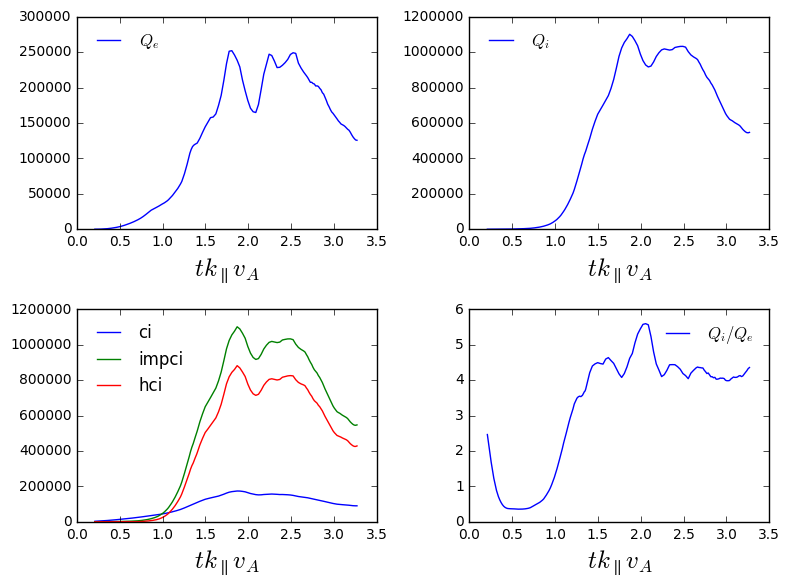

In [124]:
fs = 18
fig, axes = plt.subplots(2, 2, figsize=[8, 6])
axes = axes.flatten()
axes[0].plot(t, impce, label='$Q_e$')



axes[1].plot(t, impci, label='$Q_i$')
axes[2].plot(t, ci, label = 'ci')
axes[2].plot(t, impci, label = 'impci')
axes[2].plot(t, hci, label = 'hci')
# axes[2].plot(t, hci + ci, label = 'hci + ci')

axes[3].plot(t, impci/impce, label='$Q_i/Q_e$')
# axes[3].plot(t, hi/he, label='$Q_i/Q_e$')
# axes[3].set_ylim(0, 0.02)


for i, ax in enumerate(axes):
    ax.set_xlabel(r'$tk_\parallel v_A$', fontsize=fs)
    ax.legend(loc='best', frameon=False)
#     ax.axvline(t0, linestyle='dashed', color='g')
#     if i != 3:
#         ax.annotate('decay start', xy=(t0/max(t)-0.05, 0.5),  xycoords='axes fraction',
#                 xytext=(t0/max(t)- 0.5, 0.4), textcoords='axes fraction',
#                    arrowprops=dict(facecolor='black', width=1, headlength=5, headwidth=3))
    
fig.tight_layout()

# subpos = [0.2,0.1,0.4,0.4]
# subax = add_subplot_axes(axes[3],subpos)
# subax.plot(t, impci/impce)
# subax.set_xlim(2.7, 3.2)
# subax.set_ylim(3, 6)
# subax.set_ylim(1e-3, 1e-2)
# subax.axvline(t0, linestyle='dashed', color='g')

# fig.savefig('nl_bi_001_mix_qiqe_t_all',dpi=300)
# fig.savefig('nl_bi_001_alfven_qiqe_t_all',dpi=300)
# fig.savefig('nl_bi_001_mix_decay2_qiqe_t_all', dpi=300)

In [90]:
!open nl_bi_001_mix_qiqe_t_all.png

## Integrate Qi, Qe from .qiqe file

In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
data_dir = '/Volumes/yuguang_sd/proj/new_slow_wave_cascade/stampede/new_low_beta/';
basename = 'mix_080/mix_large_4a_6';
filename = os.path.join(data_dir, basename + '.qiqe')

data = np.loadtxt(filename)

bi = 0.01
per = 2 * np.pi * np.sqrt(bi)
plot_small, plot_medium, plot_large = False, False, False
plot_small = True

if plot_small:
    nx = 32
elif plot_medium:
    nx = 64
elif plot_large:
    nx = 128

In [110]:
# np.append(np.zeros((4, 2)), np.zeros((3, 2)), axis=0).shape

In [111]:
t = data[:, 0] / per
tmax = max(t);
#  number of polar kp bins
nkp = len(t[t == tmax])

#  number of timesteps
ntf = int(len(t) / nkp)

t  = t.reshape(ntf, nkp)
t_all = t[:, 1];
kperp = data[:, 1].reshape(ntf, nkp)
kp = kperp[0, :]
hi = data[:, 2].reshape(ntf, nkp)     # ion collisional heating
he = data[:, 3].reshape(ntf, nkp)     # electron collisional heating
goi = data[:, 4].reshape(ntf, nkp)    # ion gamma_nl / omega_nl
goe = data[:, 5].reshape(ntf, nkp)    # electron gamma_nl / omega_nl

nkx = np.floor((nx-1)/3)
boxedge = kperp[0, 0]*nkx

In [112]:
def cal_q(h):
    dk = 0.2
    q = sum(h) * dk
    return q

qi_t = np.array([cal_q(hi[i, :]) for i in range(ntf)])
qe_t = np.array([cal_q(he[i, :]) for i in range(ntf)])

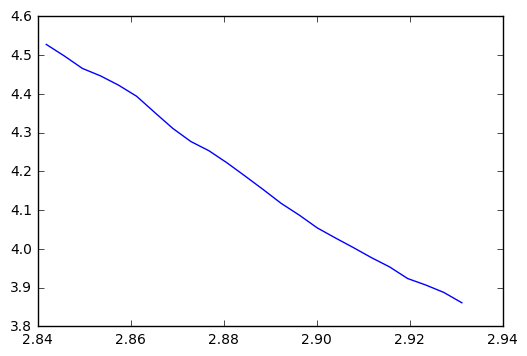

In [74]:
plt.plot(t_all, qi_t/qe_t)

In [31]:
t[:, 1]

array([ 2.84187862,  2.84187862,  2.84187862,  2.84576519,  2.84576519,
        2.84965016,  2.84965016,  2.84965016,  2.85353672,  2.85353672,
        2.85742169,  2.85742169,  2.85742169,  2.86130826,  2.86130826,
        2.86519323,  2.86519323,  2.86519323,  2.8690782 ,  2.8690782 ,
        2.87296477,  2.87296477,  2.87296477,  2.87684974,  2.87684974,
        2.8807363 ,  2.8807363 ,  2.88462127,  2.88462127,  2.88462127,
        2.88850625,  2.88850625,  2.89239281,  2.89239281,  2.89239281,
        2.89627778,  2.89627778,  2.90016434,  2.90016434,  2.90016434,
        2.90404932,  2.90404932,  2.90793429,  2.90793429,  2.90793429,
        2.91182085,  2.91182085,  2.91570583,  2.91570583,  2.91570583,
        2.91959239,  2.91959239,  2.92347736,  2.92347736,  2.92347736,
        2.92736233,  2.92736233,  2.9312489 ,  2.9312489 ])

1 slide of linear: mode property, disp
2 slide of antenna:

slow mode antenna, how to enter gyro
verification of slow mode with 

spatial analysis

fourier - transform script (.out.nc - to real space)

single 

Jz for both runs
Bpar for both runs

In [14]:
# import urllib, requests

In [128]:
# response = urllib.request.urlopen('http://hesperia.gsfc.nasa.gov/hessidata/dbase/hessi_flare_list.txt')
# response = requests.get('http://hesperia.gsfc.nasa.gov/hessidata/dbase/hessi_flare_list.txt')
# html = response.text

In [1]:
!wget http://hesperia.gsfc.nasa.gov/hessidata/dbase/hessi_flare_list.txt

--2016-12-07 11:06:59--  http://hesperia.gsfc.nasa.gov/hessidata/dbase/hessi_flare_list.txt
Resolving hesperia.gsfc.nasa.gov... 128.183.173.219, 2001:4d0:2310:150::219
Connecting to hesperia.gsfc.nasa.gov|128.183.173.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16402222 (16M) [text/plain]
Saving to: ‘hessi_flare_list.txt’

hessi_flare_list.tx 100%[===================>]  15.64M   313KB/s    in 39s     

2016-12-07 11:07:38 (414 KB/s) - ‘hessi_flare_list.txt’ saved [16402222/16402222]



In [66]:
import pandas as pd

In [57]:
df = pd.read_table('hessi_flare_list.txt', skiprows=6, header=None)

In [59]:
df.head()

,0
0,2021213 12-Feb-2002 21:29:56 21:33:38 21:41:...
1,2021228 12-Feb-2002 21:44:08 21:45:06 21:48:...
2,2021332 13-Feb-2002 00:53:24 00:54:54 00:57:...
3,2021308 13-Feb-2002 04:22:52 04:23:50 04:26:...
4,2021310 13-Feb-2002 07:03:52 07:05:14 07:07:...


In [71]:
df.iloc[0].values[0]

'  2021213 12-Feb-2002 21:29:56 21:33:38 21:41:48   712    136    167304       12-25   592  -358    692    0  A1 P1                             '

In [44]:
df.iloc[0]

0      2021213 12-Feb-2002 21:29:56 21:33:38 21:41:...
Name: 0, dtype: object

In [50]:
113923 + 7

113930

In [49]:
list(range(1, 5))

[1, 2, 3, 4]